# Zliczanie krwinek

# Niezbędne biblioteki:

In [1]:
from PIL import Image
import numpy as np
from skimage import io, filters
from scipy import ndimage
import matplotlib.pyplot as plt
import cv2

# Wczytanie obrazu:

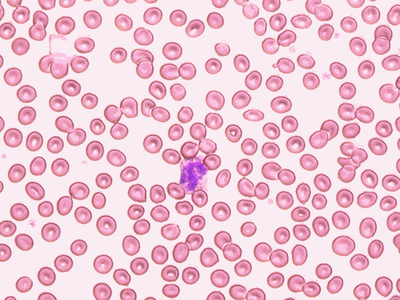

In [2]:
Im=Image.open("red_blood_cells.png")
Im

# Konwertujemy obraz do poziomu szarości:

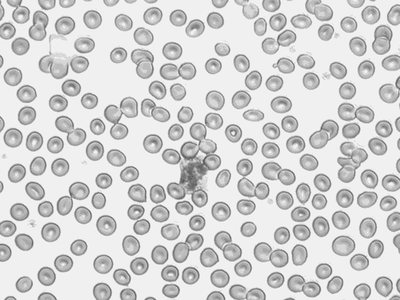

In [3]:
Im_gray= Im.convert('L') 
Im_gray

# Konwertujemy na obraz binarny (otrzymujemy różne wyniki w zależności od wyboru progu):

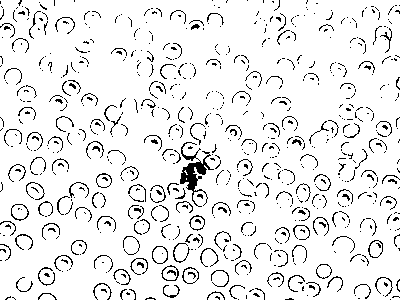

In [4]:
#I want each pixel to be either fully black (0, 0, 0) or fully white (255, 255, 255).
bw = Im_gray.point(lambda x: 0 if x<150 else 255, '1')
bw

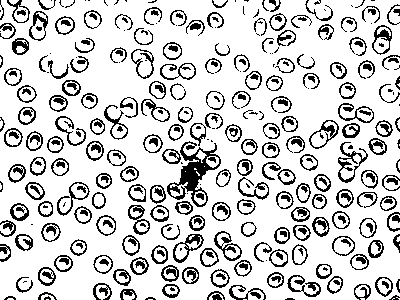

In [5]:
bw = Im_gray.point(lambda x: 0 if x<175 else 255, '1')
bw

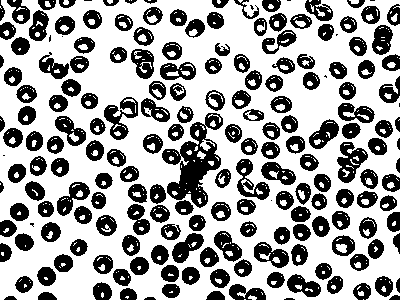

In [6]:
bw = Im_gray.point(lambda x: 0 if x<200 else 255, '1')
bw

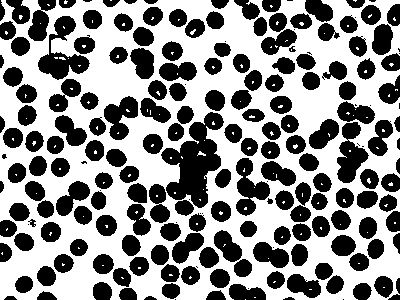

In [7]:
bw = Im_gray.point(lambda x: 0 if x<225 else 255, '1')
bw

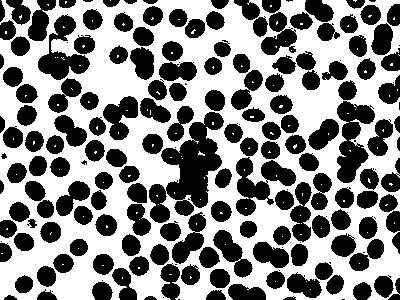

In [8]:
bw = Im_gray.point(lambda x: 0 if x<235 else 255, '1')
bw

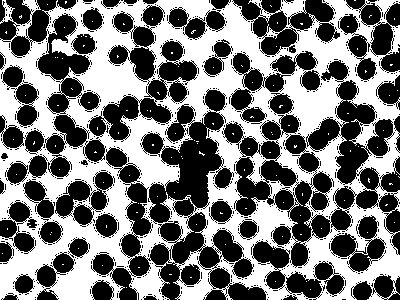

In [9]:
bw = Im_gray.point(lambda x: 0 if x<240 else 255, '1')
bw

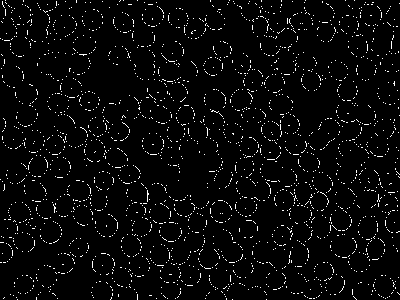

In [10]:
bw = Im_gray.point(lambda x: 0 if x<243 else 255, '1')
bw

# Znajdujemy optymalną wartość progu za pomocą histogramu:

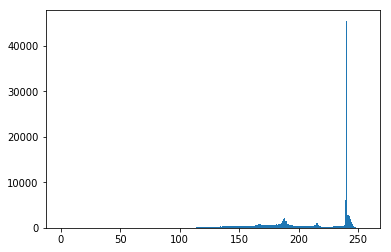

In [11]:
img = cv2.imread('red_blood_cells.png',0)
plt.hist(img.ravel(),256,[0,256]); plt.show()

In [12]:
img = cv2.imread('red_blood_cells.png', cv2.IMREAD_GRAYSCALE)

In [13]:
# create the histogram
histogram = cv2.calcHist([img], [0], None, [256], [0, 256])

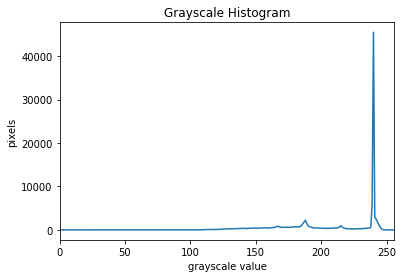

In [14]:
# configure and draw the histogram figure
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.xlim([0, 256])

plt.plot(histogram)
plt.show()

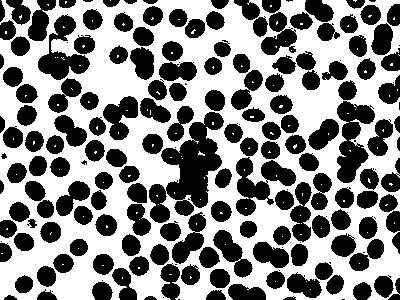

In [15]:
bw = Im_gray.point(lambda x: 0 if x<235 else 255, '1')
bw

# Wypełniamy wnętrza komórek (porówanie efektów wykorzystania różnych progów):

In [16]:
im = io.imread('red_blood_cells.png', as_gray=True)

#http://scikit-image.org/docs/dev/api/skimage.filters.html - na tej stronce mamy różne filtry
value1 = filters.threshold_otsu(im)
value2 = filters.threshold_yen(im)
value3 = filters.threshold_li(im)
value4 = filters.threshold_mean(im)
value5 = filters.threshold_minimum(im)
value6 = filters.threshold_triangle(im)

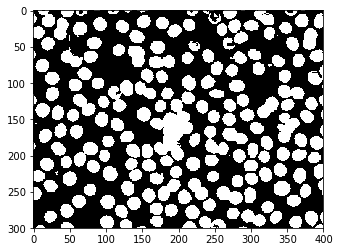

In [17]:
drops1 = ndimage.binary_fill_holes(im < value1)
plt.imshow(drops1, cmap='gray')
plt.show()

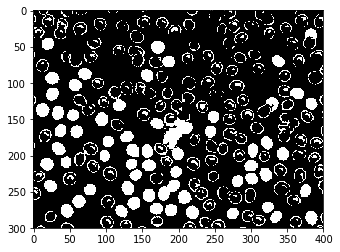

In [18]:
drops2 = ndimage.binary_fill_holes(im < value2)
plt.imshow(drops2, cmap='gray')
plt.show()

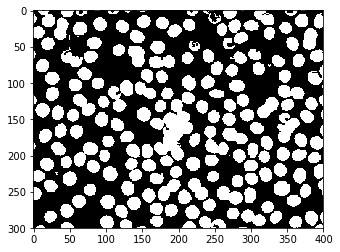

In [19]:
drops3 = ndimage.binary_fill_holes(im < value3)
plt.imshow(drops3, cmap='gray')
plt.show()

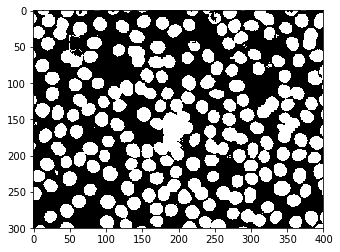

In [20]:
drops4 = ndimage.binary_fill_holes(im < value4)
plt.imshow(drops4, cmap='gray')
plt.show()

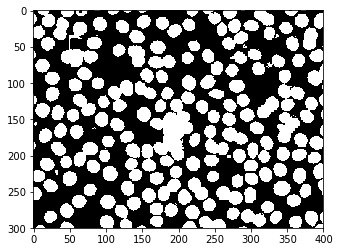

In [21]:
drops5 = ndimage.binary_fill_holes(im < value5)
plt.imshow(drops5, cmap='gray')
plt.show()

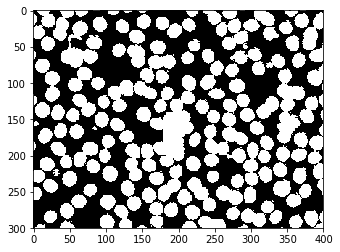

In [22]:
drops6 = ndimage.binary_fill_holes(im < value6)
plt.imshow(drops6, cmap='gray')
plt.show()

# Zliczamy krwinki:

In [23]:
from skimage import measure
labels = measure.label(drops1)
print(labels.max())

194


# Inny przykład:

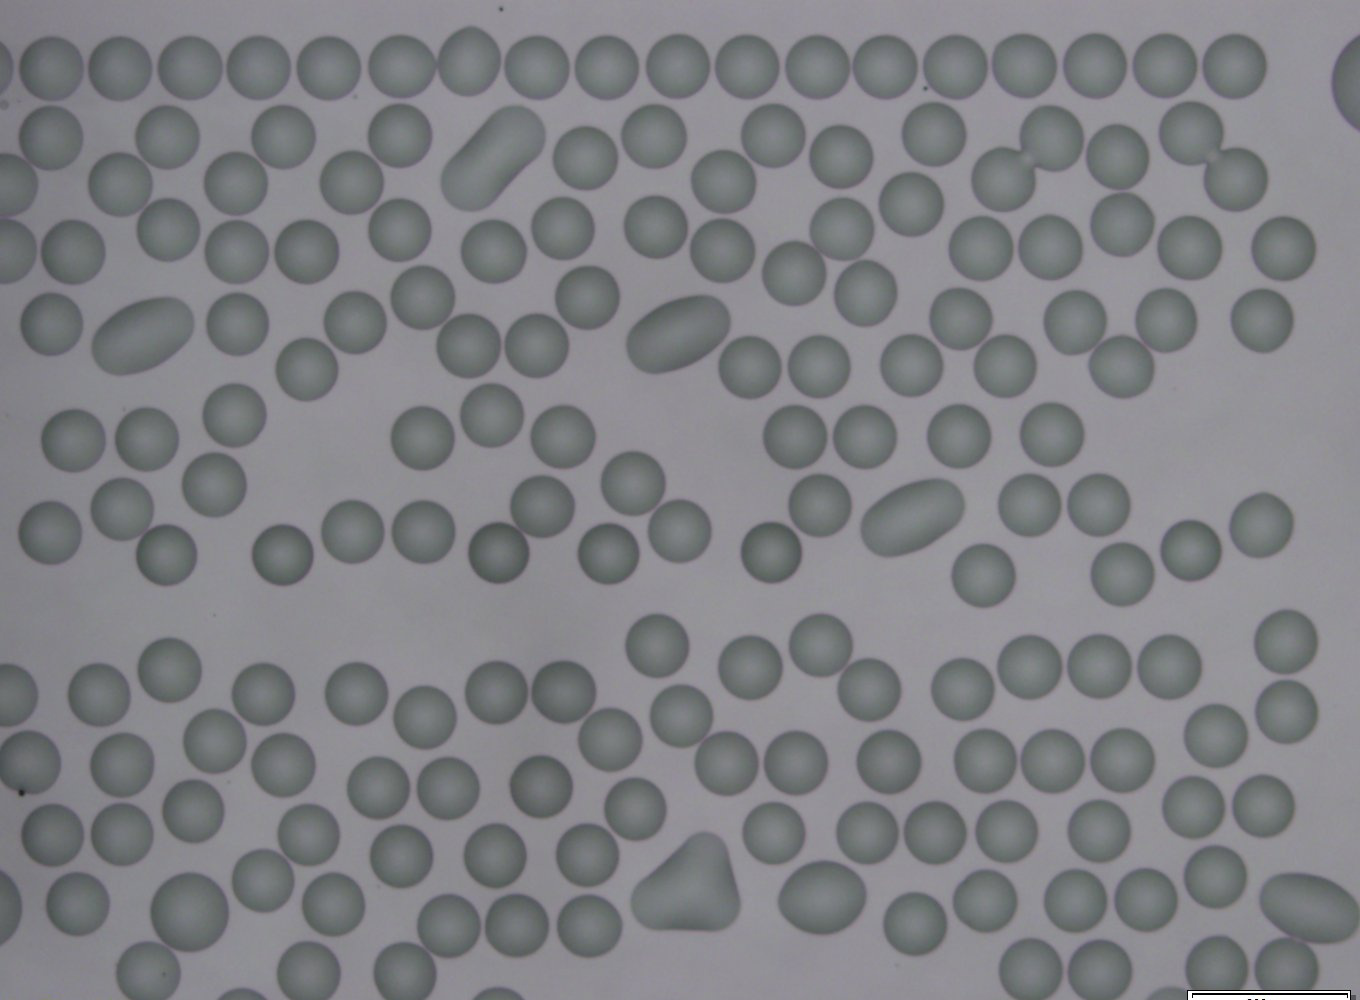

In [24]:
Im2=Image.open("blood_cells.jpg")
Im2

In [25]:
im2 = io.imread('blood_cells.jpg', as_gray=True)
value1 = filters.threshold_otsu(im2)
value2 = filters.threshold_yen(im2)
value3 = filters.threshold_li(im2)
value4 = filters.threshold_mean(im2)
value5 = filters.threshold_minimum(im2)
value6 = filters.threshold_triangle(im2)

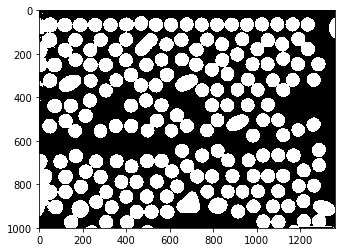

In [26]:
drops1 = ndimage.binary_fill_holes(im2 < value1)
plt.imshow(drops1, cmap='gray')
plt.show()

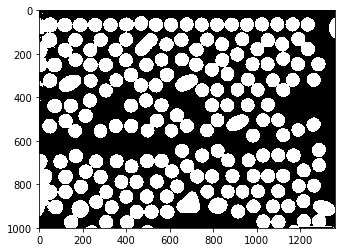

In [27]:
drops2 = ndimage.binary_fill_holes(im2 < value2)
plt.imshow(drops2, cmap='gray')
plt.show()

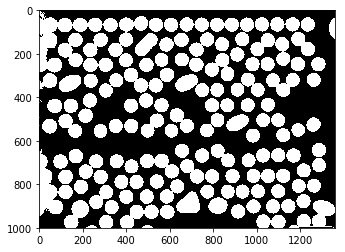

In [28]:
drops3 = ndimage.binary_fill_holes(im2 < value3)
plt.imshow(drops3, cmap='gray')
plt.show()

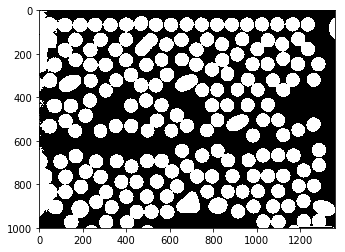

In [29]:
drops4 = ndimage.binary_fill_holes(im2 < value4)
plt.imshow(drops4, cmap='gray')
plt.show()

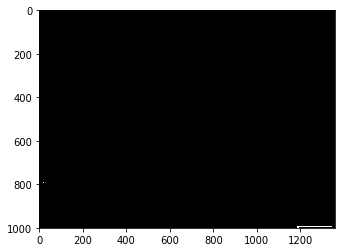

In [30]:
drops5 = ndimage.binary_fill_holes(im2 < value5)
plt.imshow(drops5, cmap='gray')
plt.show()

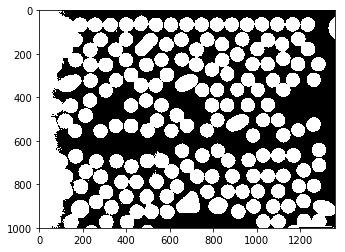

In [31]:
drops6 = ndimage.binary_fill_holes(im2 < value6)
plt.imshow(drops6, cmap='gray')
plt.show()

In [32]:
from skimage import measure
labels = measure.label(drops1)
print(labels.max())

176
